# This notebook demonstrate an example case to run each clustering method in the project.

In [2]:
%run -i '__init__.py'

## Test run with model M5b

In [2]:
%run -i 'full_script.py' 'M5b' "vp vs dn vp/vs qp qs x z" "full"

2019-08-28 16:19:32,032 | INFO : HDBScan elapsed time: 0.157264
2019-08-28 16:19:32,034 | INFO : Data saved at: M5b_full_hdb.npy
2019-08-28 16:21:03,963 | INFO : FCM elapsed time: 91.926993
2019-08-28 16:21:03,967 | INFO : Data saved at: M5b_full_fcm.npy
2019-08-28 16:21:06,801 | INFO : Not enough labeled neighbor to perform KNN.
                      Will return the original inputted value.


/anaconda3/lib/python3.6/site-packages/skimage/segmentation/random_walker_segmentation.py:407: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  warn('Random walker only segments unlabeled areas, where '


2019-08-28 16:21:43,323 | INFO : SOM elapsed time: 39.354913
2019-08-28 16:22:49,539 | INFO : FCM elapsed time: 66.213427
2019-08-28 16:22:49,539 | INFO : SOM-FCM elapsed time: 105.570115
2019-08-28 16:22:49,647 | INFO : HDBScan elapsed time: 0.106892
2019-08-28 16:22:49,648 | INFO : SOM-HDBScan elapsed time: 39.462493
2019-08-28 16:22:49,649 | INFO : Data saved at: M5b_full_som.npy
2019-08-28 16:22:49,652 | INFO : Data saved at: M5b_full_somfcm.npy
2019-08-28 16:22:49,654 | INFO : Data saved at: M5b_full_somhdb.npy


In [4]:
from sklearn.metrics import calinski_harabaz_score as cal_har_sc

def plot_res(fnames, norm_data):
    for i in range(len(fnames)):
        pdir = fnames[i]
        pred = np.load(pdir)
        if('fcm' in fnames[i]):
            pred = fh.get_best_fuzz(pred)
        if('som' in fnames[i] and 'fcm' not in fnames[i] and 'hdb' not in fnames[i]):
            for j in range(pred.shape[0]):
                sil = mh.int_eval_silhouette(norm_data, pred[j])
                ch = cal_har_sc(norm_data, pred[j])
                ent, pur = mh.ext_eval_entropy(label, pred[j])
                print(fnames[i], ",", sil, ",", ch, ",", ent, ",", pur)
                mh.plot_e_model(pred[j], x, z, title=fnames[i], sep_label=True)
        else:
            sil = mh.int_eval_silhouette(norm_data, pred)
            ch = cal_har_sc(norm_data, pred)
            ent, pur = mh.ext_eval_entropy(label, pred)
            print(fnames[i], ",", sil, ",", ch, ",", ent, ",", pur)
            mh.plot_e_model(pred, x, z, title=fnames[i], sep_label=True)



In [3]:
# load data 
model = 'M5b'
ldir = '../data/' + model + '_data_label.npy'
label = np.load(ldir)

pdir = '../data/' + model + '_xz_pos.npy'
xz_pos = np.load(pdir)
x = xz_pos[:, 0]
z = xz_pos[:, 1]

mdir = '../data/' + model + '_clean_data.npy'
norm_data = np.load(mdir)

In [4]:
# files of the results
fnames_m5b = ["M5b_full_fcm.npy",
            "M5b_full_hdb.npy",
            "M5b_full_kmn.npy",
            "M5b_full_som.npy",
            "M5b_full_somfcm.npy",
            "M5b_full_somhdb.npy"]

# Model M5b results
### All Parameters

M5b_full_fcm.npy , -0.12043853693350058 , 441.2460832476799 , 0.6140603848279711 , 0.7346594107712516


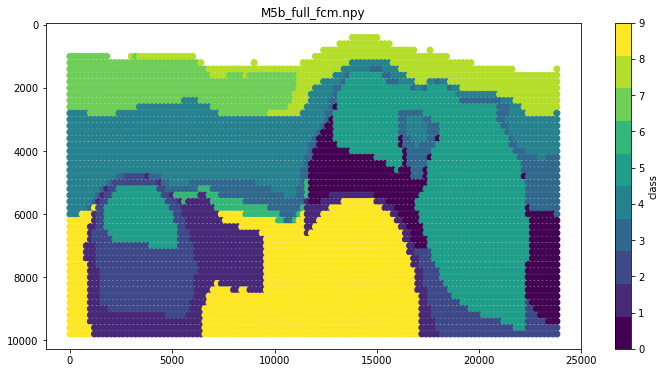

M5b_full_hdb.npy , -0.10170648787482812 , 441.7669735870211 , 0.49891283509897216 , 0.770501032088572


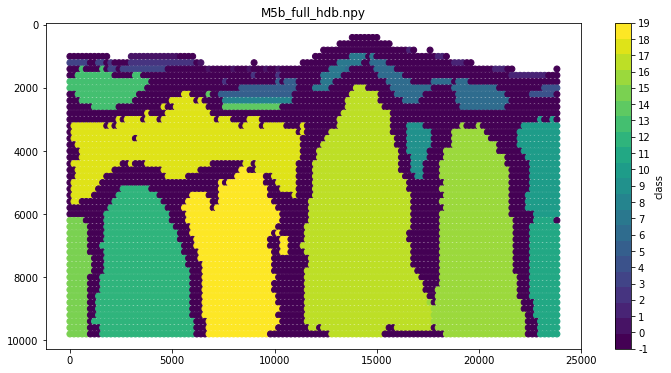

M5b_full_kmn.npy , 0.018487388383303726 , 1098.3642609905703 , 0.4789326032535317 , 0.8414336648526928


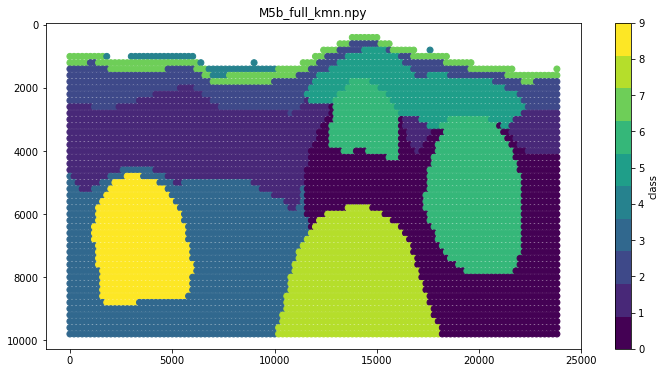

M5b_full_som.npy , 0.11030436367983802 , 161.4928255179705 , 1.313996351072692 , 0.4800150121974104


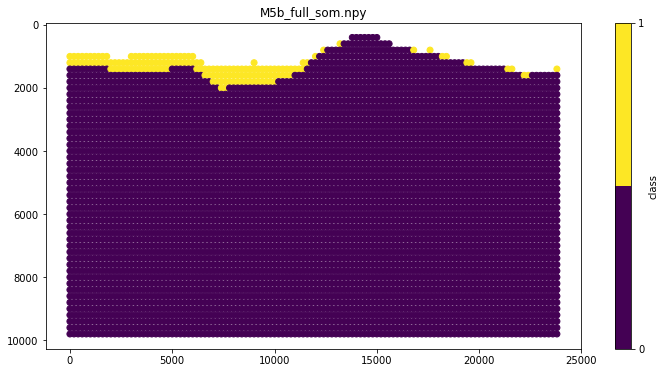

M5b_full_somfcm.npy , 0.07539468561139552 , 1409.0216188258512 , 0.5776712760586873 , 0.7731281666353913


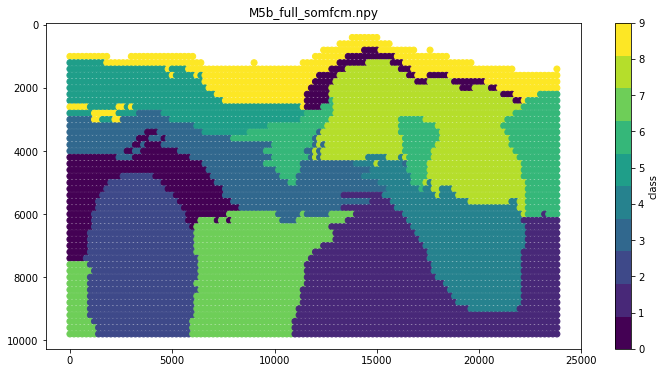

M5b_full_somhdb.npy , -0.14745637304106599 , 160.59171332967992 , 0.26083818671047804 , 0.8979170576093075


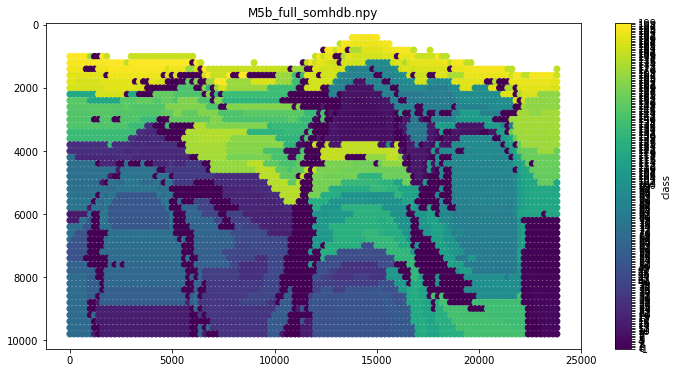

In [5]:
i = 0
plot_res(fnames_m5b[i*6:(i+1)*6], norm_data)
i += 1